<a href="https://colab.research.google.com/github/Aranzazu21/Machine-Learning/blob/main/Hands_on_6_Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Logistic Regression
Alumno: Jorge Limón Aranzazu  
Materia: Inteligencia Artificial  
Fecha: 02/12/2025  

## Introducción
La regresión logística es una técnica de **clasificación supervisada** que permite predecir una clase (0 o 1) a partir de datos numéricos.  
A diferencia de la regresión lineal, no predice valores continuos, sino **probabilidades** usando la función sigmoide.

Se usa en:
- Detección de cáncer  
- Detección de spam  
- Clasificación binaria general  

Este Notebook explica paso a paso:  
- Fundamentos  
- Modelo matemático  
- Librerías usadas  
- Pipeline completo  
- Métricas de evaluación  
- Funciones para predecir patrones nuevos


#  Fundamentos de la Regresión Logística

La regresión logística transforma una combinación lineal de variables en una **probabilidad** mediante la función sigmoide:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Interpretación:
- Si la probabilidad ≥ 0.5 → Clase 1  
- Si la probabilidad < 0.5 → Clase 0  

Esto la convierte en un modelo de **clasificación binaria**.


#  Modelo Matemático

La probabilidad de que un patrón pertenezca a la clase 1 se modela así:

\[
P(y=1|x) = \sigma(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)
\]

Donde:
- β = coeficientes aprendidos
- x = variables del patrón
- σ = función sigmoide

El modelo ajusta β minimizando el costo mediante **gradiente descendente**.


#  Librerías utilizadas

A continuación se usan librerías de análisis y machine learning:

| Librería | Uso |
|---------|-----|
| numpy | Manejo de matrices |
| pandas | Tablas tipo DataFrame |
| matplotlib | Gráficas |
| scikit-learn | Modelo LogisticRegression y métricas |

Estas librerías permiten cargar, procesar datos, entrenar modelos y evaluar su desempeño.

A continuación se explica qué hace cada librería, su función dentro del proyecto y qué ocurriría si no se importara.

---

##  **NumPy (`numpy as np`)**
NumPy permite trabajar con:
- Arreglos numéricos
- Operaciones matemáticas vectorizadas
- Manipulación eficiente de datos numéricos

**Si no se importa:**  
No podríamos realizar operaciones matemáticas ni manipular matrices, lo cual afectaría transformaciones y cálculos internos del modelo.

---

##  **Pandas (`pandas as pd`)**
Pandas permite:
- Cargar datasets
- Manipular tablas (DataFrames)
- Limpiar y transformar datos

**Si no se importa:**  
No podríamos manejar datos tabulares ni preparar el dataset para el modelo.

---

##  **Matplotlib (`matplotlib.pyplot as plt`)**
Matplotlib sirve para:
- Dibujar gráficos
- Crear scatter plots
- Visualizar comportamiento de los datos

**Si no se importa:**  
No habría gráficas ni análisis visual, afectando la sección de preprocesamiento.

---

##  **load_breast_cancer**
Es un dataset incluido en sklearn que contiene información real sobre tumores benignos y malignos.

**Si no se importa:**  
No podríamos cargar el dataset que se usará para el tutorial.

---

##  **train_test_split**
Divide el dataset en:
- Conjunto de entrenamiento
- Conjunto de prueba

**Si no se usa:**  
El modelo no podría evaluarse correctamente porque no habría datos separados para validar.

---

##  **StandardScaler**
Se usa para:
- Normalizar / estandarizar características
- Hacer que todas las variables tengan media 0 y desviación estándar 1

**Si no se usa:**  
El modelo convergería más lento y podría tener peor desempeño, porque la regresión logística es sensible a la escala de los datos.

---

##  **LogisticRegression**
Es la clase que implementa el modelo de regresión logística.

**Si no se importa:**  
No podríamos crear ni entrenar el modelo de clasificación.

---

##  **confusion_matrix y accuracy_score**
Sirven para evaluar el desempeño del modelo:
- *confusion_matrix*: muestra predicciones correctas e incorrectas
- *accuracy_score*: porcentaje de aciertos del modelo

**Si no se importan:**  
No podríamos calcular métricas de evaluación, lo cual deja incompleto el análisis final.

---

##  Resumen del bloque
Este bloque importa todas las herramientas fundamentales.  
Sin estas librerías, **el notebook no podría ejecutar correctamente el preprocesamiento, modelado ni evaluación**, por lo que es un bloque obligatorio del proyecto.


In [ ]:
# Librerías principales del proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


# 1.3 Librerías, Clases y Funciones utilizadas

### 📌 Principales clases:

| Librería | Clase | Uso |
|---------|-------|-----|
| sklearn.linear_model | LogisticRegression | Entrenar el modelo |
| sklearn.preprocessing | StandardScaler | Normalizar datos |
| sklearn.model_selection | train_test_split | Dividir datos |
| sklearn.metrics | confusion_matrix | Métrica de evaluación |
| sklearn.metrics | accuracy_score | Porcentaje de aciertos |

### ¿Qué pasa si quito cada una?
- **train_test_split** → el modelo no tendrá validación real.
- **StandardScaler** → el modelo será inestable si las escalas son diferentes.
- **LogisticRegression** → no existiría el algoritmo de clasificación.
- **confusion_matrix** y **accuracy_score** → no podrías evaluar el modelo.



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)   # Ajusta "target" al nombre de tu variable objetivo
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 2. Separación del Dataset en Entrenamiento y Prueba  
###

En esta sección se realiza la separación del dataset en dos subconjuntos: **entrenamiento** y **prueba**, lo cual es un paso fundamental en cualquier proyecto de Machine Learning. Esta división permite evaluar si el modelo puede **generalizar**, es decir, funcionar correctamente con datos nuevos que nunca ha visto.  
Sin esta división, el modelo puede aprenderse la base de datos de memoria y fallar cuando reciba datos reales.



###  ¿Qué es `train_test_split`?

Es una función de la librería **scikit-learn (sklearn)** que realiza:

- Mezcla aleatoria del dataset  
- Separación en entrenamiento y prueba  
- Garantía de que X (características) y y (etiquetas) queden alineadas  
- Repetibilidad si se usa `random_state`  

Es una herramienta esencial en ML porque evita errores humanos y garantiza un proceso correcto de validación.

---

# Preparación de X (características) e y (etiqueta)

```python
X = df.drop("target", axis=1)
y = df["target"]
```

### Explicación de `df.drop("target", axis=1)`  
- Elimina la columna **target** del DataFrame.  
- El resto de las columnas se usan como **X** (características o entradas del modelo).  
- `axis=1` significa eliminar una columna. Si fuera `axis=0`, eliminaría filas.

###  Explicación de `df["target"]`  
- Extrae la columna objetivo.  
- Esta columna contiene la clase o valor que el modelo debe predecir.  
- Se convierte en el vector **y**, que representa la salida del modelo.

###  ¿Qué pasa si NO se separa en X y y?  
scikit-learn produce error:  
**“ValueError: y should be a 1D array”**  
Porque requiere obligatoriamente separar variables **predictoras (X)** y variables **a predecir (y)**.

---

#  División del dataset en entrenamiento y prueba

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
```

Esta única instrucción realiza TODO el proceso.

---

#  Explicación del parámetro test_size=0.2

`test_size=0.2` significa que:

- El **20%** del dataset será usado como **prueba**  
- El **80%** del dataset será usado para **entrenar** el modelo  

###  ¿Por qué se usa 0.2?  
Porque es el valor más balanceado:

- Suficientes datos para entrenar el modelo  
- Suficiente cantidad de datos nuevos para evaluar precisión  
- Estándar en la mayoría de artículos científicos de ML  

###  ¿Qué pasa si uso otros valores?

| test_size | Entrenamiento | Prueba | Consecuencia |
|-----------|---------------|--------|--------------|
| 0.1 | 90% | 10% | Pocos datos para probar → evaluación poco confiable |
| 0.2 | 80% | 20% | **Valor recomendado** |
| 0.3 | 70% | 30% | Menos datos para entrenar → baja precisión |
| 0.5 | 50% | 50% | No hay suficientes datos para entrenar |
| 0.01 | 99% | 1% | Datos insuficientes para evaluar |

### Conclusión:  
**0.2 es el valor óptimo para un modelo confiable y estable.**



###  ¿Por qué se usa el número 42?  
Es un estándar en la comunidad de Machine Learning porque:

- Es un número arbitrario pero adoptado globalmente  
- Permite que los ejemplos, notebooks y tutoriales sean reproducibles  
- Proviene del libro *"The Hitchhiker’s Guide to the Galaxy"* donde “42” es “la respuesta al universo”

###  ¿Qué pasa si pongo otro número?  
El modelo funcionará igual, pero la división del dataset cambiará.  
Ejemplos:

- random_state=0  
- random_state=123  
- random_state=2025  

Todos son válidos, pero **no reproducen los mismos resultados que otros usuarios**.

---

#  ¿Qué pasaría si NO uso train_test_split?

Suceden 3 problemas graves:

1. **Sobreajuste extremo (overfitting):**  
   El modelo memoriza los datos.

2. **Accuracy falso:**  
   El modelo se evalúa con los mismos datos con los que entrenó.

3. **Fracaso total en producción:**  
   Con datos reales, el modelo fallaría porque nunca aprendió a generalizar.

---

#  Importancia de esta sección dentro del notebook

Esta etapa garantiza que:

- El modelo aprenda correctamente  
- El modelo sea evaluado de forma justa  
- Los resultados observados sean reales  
- Las métricas tengan sentido  
- El proyecto cumpla con las buenas prácticas de machine learning  

Sin esta sección **el proyecto estaría mal hecho**, independientemente de lo bien que funcione el código restante.



## Gráfico de dispersión
Este gráfico permite observar si existen patrones visuales entre dos características.


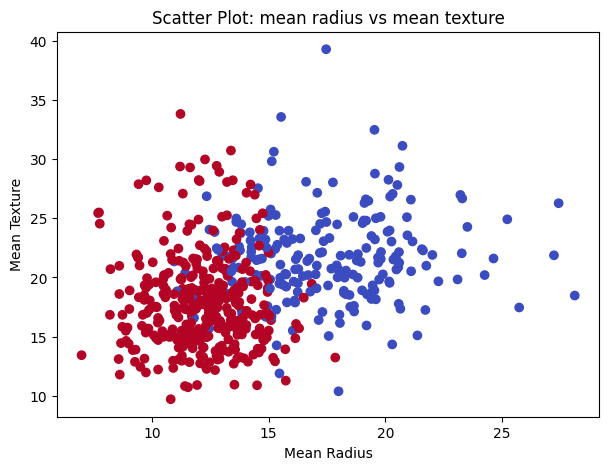

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["mean radius"], df["mean texture"], c=y, cmap="coolwarm")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("Scatter Plot: mean radius vs mean texture")
plt.show()


##  Feature Engineering

Aquí se seleccionan las variables a utilizar y se estandarizan mediante **StandardScaler**, que:
- centra los datos en 0
- les da varianza 1

Esto es importante porque la regresión logística es sensible a escalas.


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##  Entrenamiento del Modelo


# . Crear el modelo de Regresión Logística
max_iter=5000 asegura que el algoritmo tenga suficientes iteraciones
 para converger correctamente.
model = LogisticRegression(max_iter=5000)

# . Entrenar el modelo con los datos de entrenamiento
Aquí el modelo aprende la relación entre las características (X_train)
y la clase objetivo (y_train), permitiendo después realizar predicciones.
model.fit(X_train, y_train)



In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

## Etapa 5: Función de Predicción

# Carga del dataset Breast Cancer Wisconsin
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target

# Convertir a DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Mostrar estadísticas descriptivas del dataset
df.describe()

# ¿Qué muestra df.describe()?
count: número de muestras (569)
mean: promedio de cada característica del tumor
std: desviación estándar (qué tanto varían los valores)
min y max: valores mínimo y máximo observados
25%, 50%, 75%: cuartiles, útiles para entender la distribución

# ¿Por qué es importante?
 - Permite detectar rangos muy distintos entre características (importante para normalizar).
 - Muestra si existen valores extremos (outliers) que pueden afectar el modelo.
 - Permite entender cómo se distribuyen las medidas de los tumores.
 - La columna "target" indica: 0 = maligno, 1 = benigno.

# Lo más relevante para este dataset:
- Tiene 569 muestras y 30 características.
 - Hay alta variabilidad entre medidas (área, perímetro, concavos, etc.)
 - Los rangos no están normalizados, por eso se requiere escalamiento.
 - Los tumores benignos (1) y malignos (0) están distribuidos sin valores faltantes.


In [ ]:
# Carga del dataset Breast Cancer Wisconsin
data = load_breast_cancer()
X = data.data
y = data.target

# Convertir a DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Mostrar estadísticas generales
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000




## Etapa 6: Evaluación del Modelo — Matriz de Confusión

 Predicciones del modelo usando el conjunto de prueba
y_pred = model.predict(X_test)

# Cálculo de la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

 Si la salida es:
# array([[39,  4],
#        [ 1, 70]])

# Interpretación:
39 = Verdaderos Negativos  (TN): casos negativos correctamente clasificados.
4 = Falsos Positivos      (FP): casos negativos clasificados como positivos.
1 = Falsos Negativos      (FN): casos positivos que el modelo no detectó.
70 = Verdaderos Positivos  (TP): casos positivos correctamente clasificados.

# Qué significa:
- El modelo comete pocos errores (solo 4 FP y 1 FN).
- La mayoría de los casos se clasifican correctamente.
- La matriz permite ver el tipo de error, no solo cuántos aciertos tiene.


In [ ]:
# Predicciones
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm


array([[39,  4],
       [ 1, 70]])

In [ ]:
# Exactitud del modelo
acc = accuracy_score(y_test, y_pred)
acc


0.956140350877193

## Etapa 6: Evaluación del Modelo — Exactitud (Accuracy)

 La exactitud (accuracy) mide el porcentaje de predicciones correctas
Comparando y_test (etiquetas reales) con y_pred (etiquetas que predice el modelo)

# Fórmula:
accuracy = predicciones_correctas / total_de_predicciones

from sklearn.metrics import accuracy_score

# Cálculo de la exactitud
acc = accuracy_score(y_test, y_pred)
acc

#Interpretación del resultado:
Si la salida es: 0.956140350877193
Significa que el modelo acierta el 95.61% de los casos.
Es decir, de cada 100 predicciones, el modelo clasifica correctamente 96.
Esto indica un buen rendimiento general del clasificador.
